In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
d = pd.read_csv('heart-disease.csv')
 

In [3]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
d.rename(columns={
    'cp': 'chest_pain',
    'trestbps': 'blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'blood_sugar',
    'restecg': 'rest_ecg',
    'thalach': 'hearth_rate',
    'exang': 'exercise_angina',
    'oldpeak': 'st_peak',
    'slope': 'st_slope',
    'ca': 'n_vessels',
    'thal': 'thallium',
    'target': 'heart_disease'}, inplace=True)

In [5]:
d.sex.replace({
    0: 'woman',
    1: 'man'}, inplace=True)
d.chest_pain.replace({
    1: 'typical',
    2: 'atypical',
    3: 'non-anginal',
    0: 'none'}, inplace=True)
d.blood_sugar.replace({
    0: 'normal',
    1: 'high'}, inplace=True)
d.rest_ecg.replace({
    1: 'normal',
    2: 'wave-abnormal',
    0: 'lv-hyperthrophy'}, inplace=True)
d.exercise_angina.replace({
    0: 'no',
    1: 'yes'}, inplace=True)
d.st_slope.replace({
    2: 'increasing',
    1: 'flat',
    0: 'decreasing'}, inplace=True)
d.thallium.replace({
    0: float('nan'), # 0 is not a valid value
    2: 'normal',
    1: 'fixed',
    3: 'reversable'}, inplace=True)
d.heart_disease.replace({
    0: 'yes',
    1: 'no'}, inplace=True)

In [6]:
d.mode()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,rest_ecg,hearth_rate,exercise_angina,st_peak,st_slope,n_vessels,thallium,heart_disease
0,58.0,man,none,120.0,197,normal,normal,162.0,no,0.0,increasing,0.0,normal,no
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
d.mode().iloc[0]

age                        58
sex                       man
chest_pain               none
blood_pressure            120
cholesterol               197
blood_sugar            normal
rest_ecg               normal
hearth_rate               162
exercise_angina            no
st_peak                     0
st_slope           increasing
n_vessels                   0
thallium               normal
heart_disease              no
Name: 0, dtype: object

In [8]:
categoricals = ['sex', 'chest_pain', 'blood_sugar', 'rest_ecg', 'exercise_angina',
                'st_slope', 'thallium', 'heart_disease', 'n_vessels']
numericals = ['age', 'blood_pressure', 'cholesterol', 'hearth_rate', 'st_peak']

In [9]:
for col in categoricals:
    d[col] = d[col].astype('category')

In [10]:
categoricals = [c for c in categoricals if c != 'heart_disease']

In [11]:
col_order = numericals + categoricals + ['heart_disease']

In [12]:
d = d.loc[:, col_order]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Text(0.5, 1.0, 'Correlation between numerical variables')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


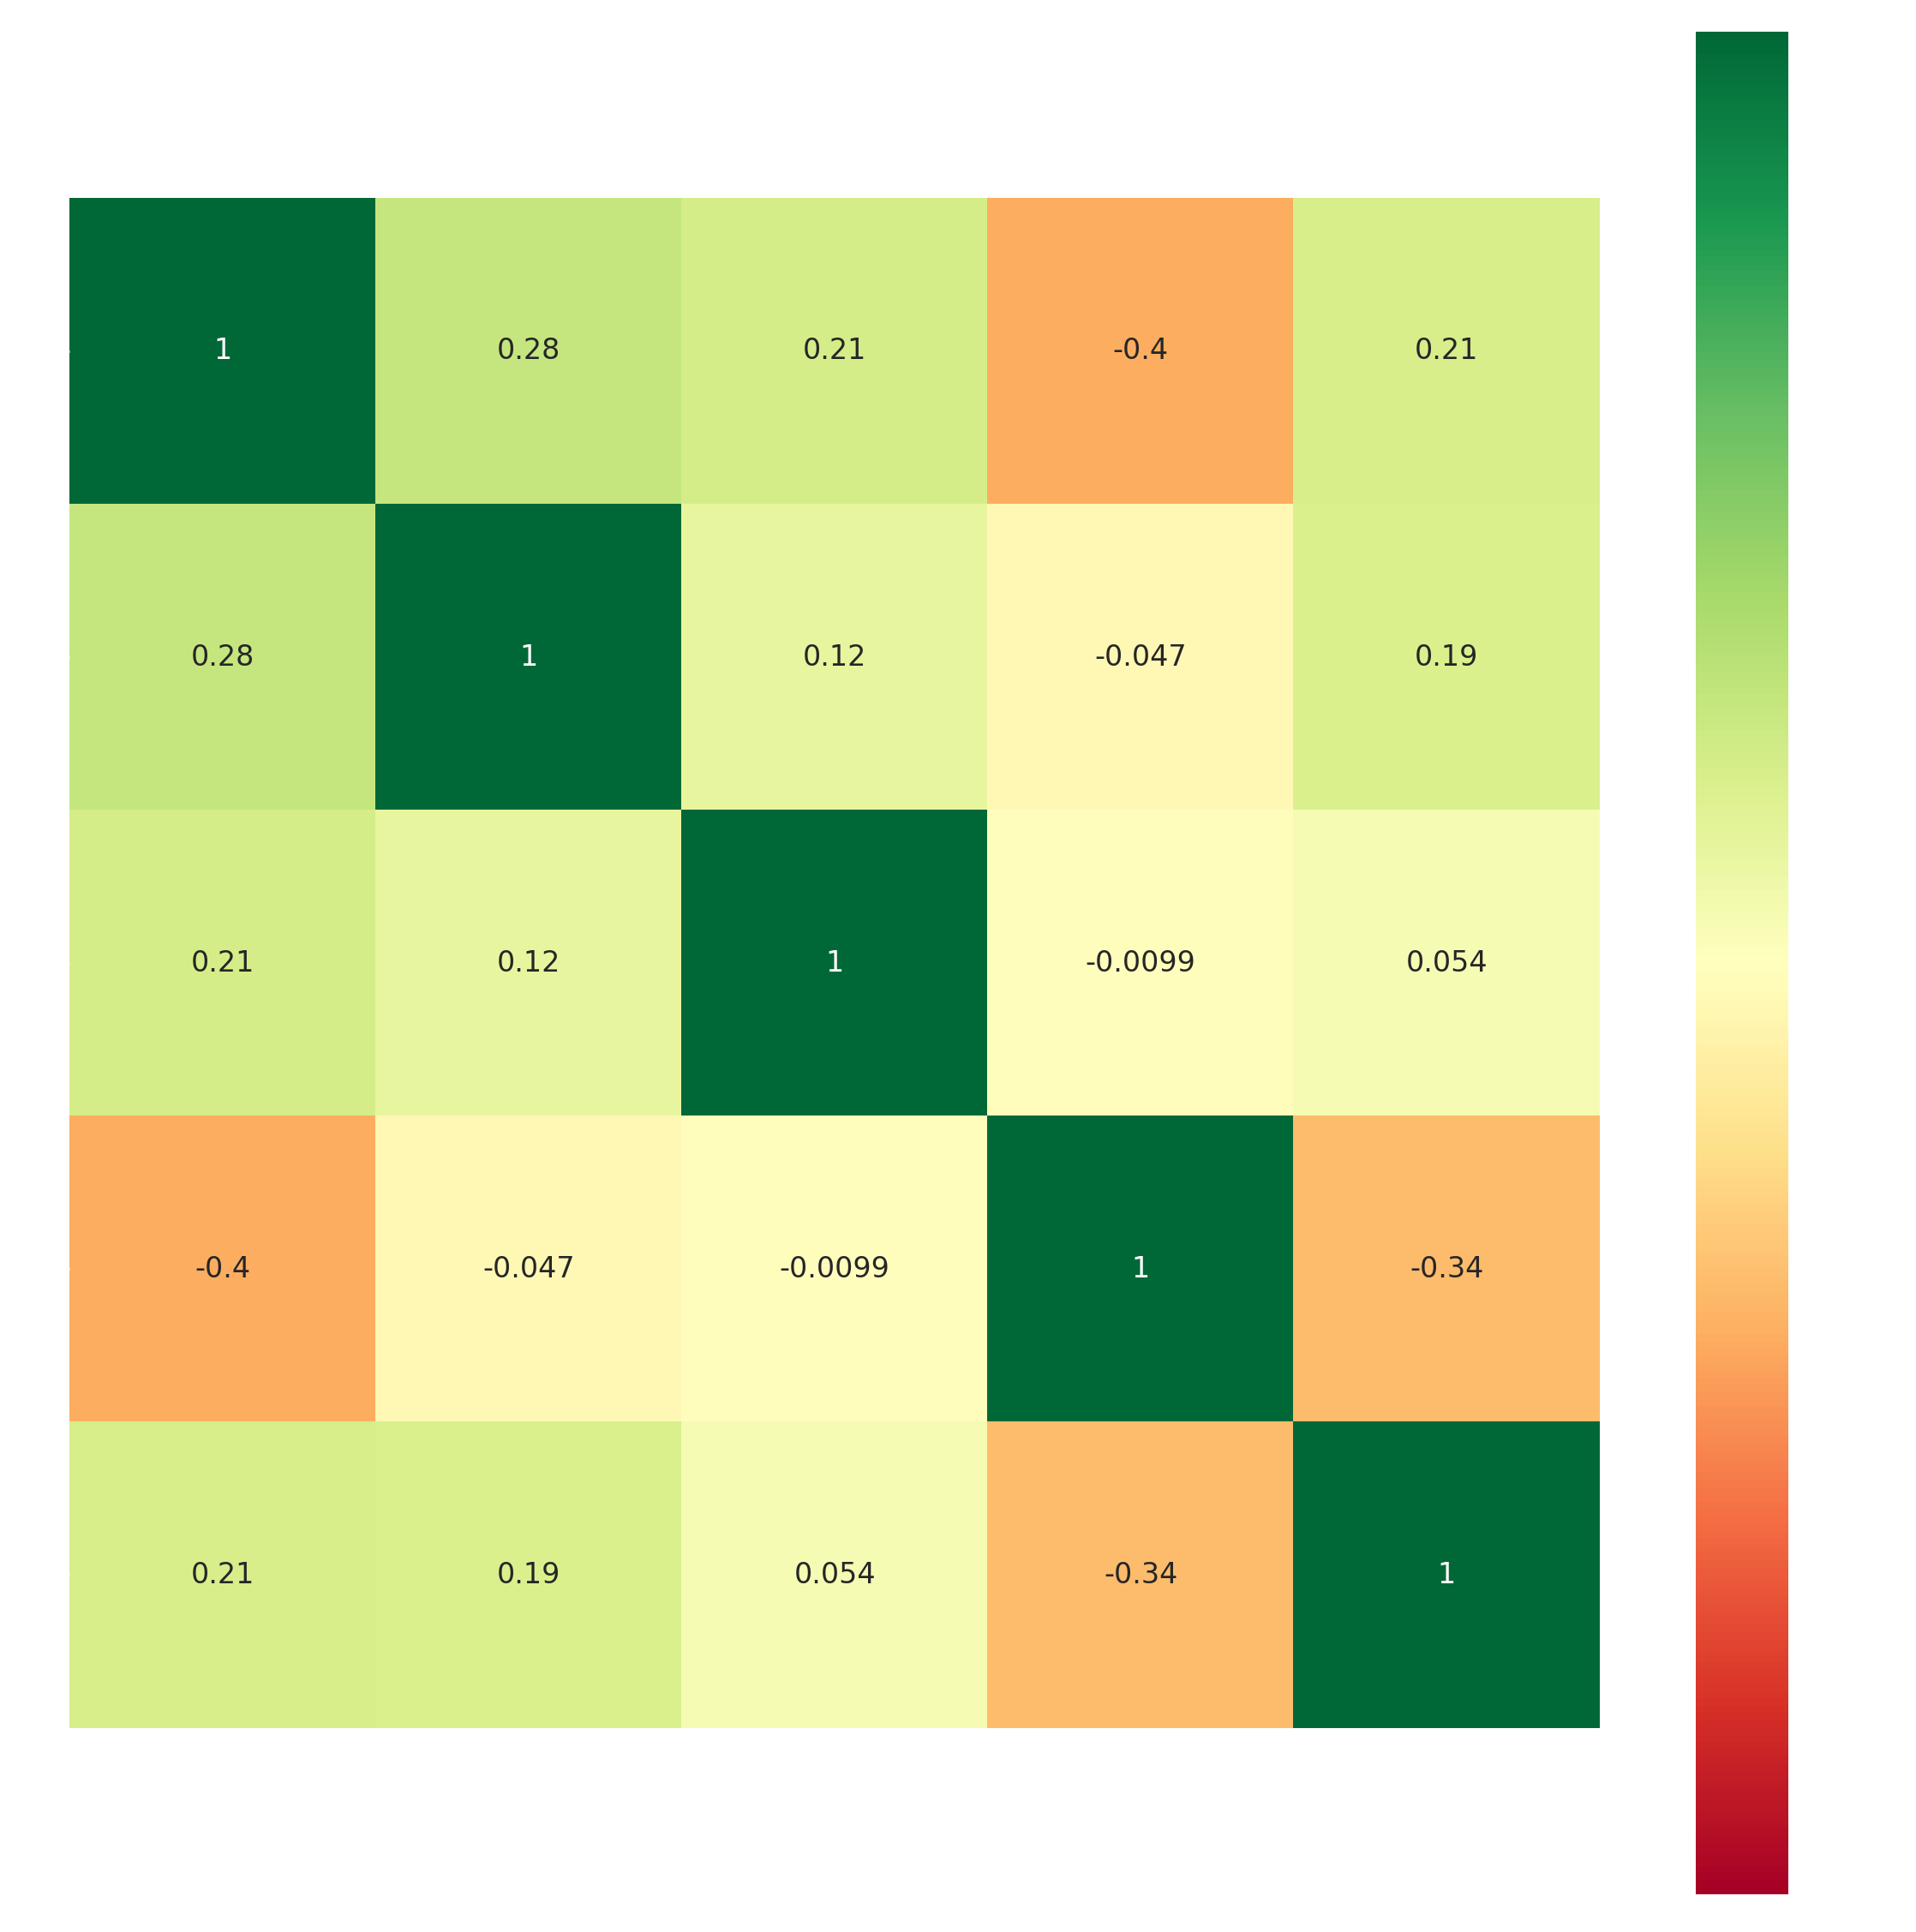

In [13]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(d.corr(), square=True, annot=True, cmap=plt.cm.RdYlGn, vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation between numerical variables', fontsize=18)

ZeroDivisionError: division by zero

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


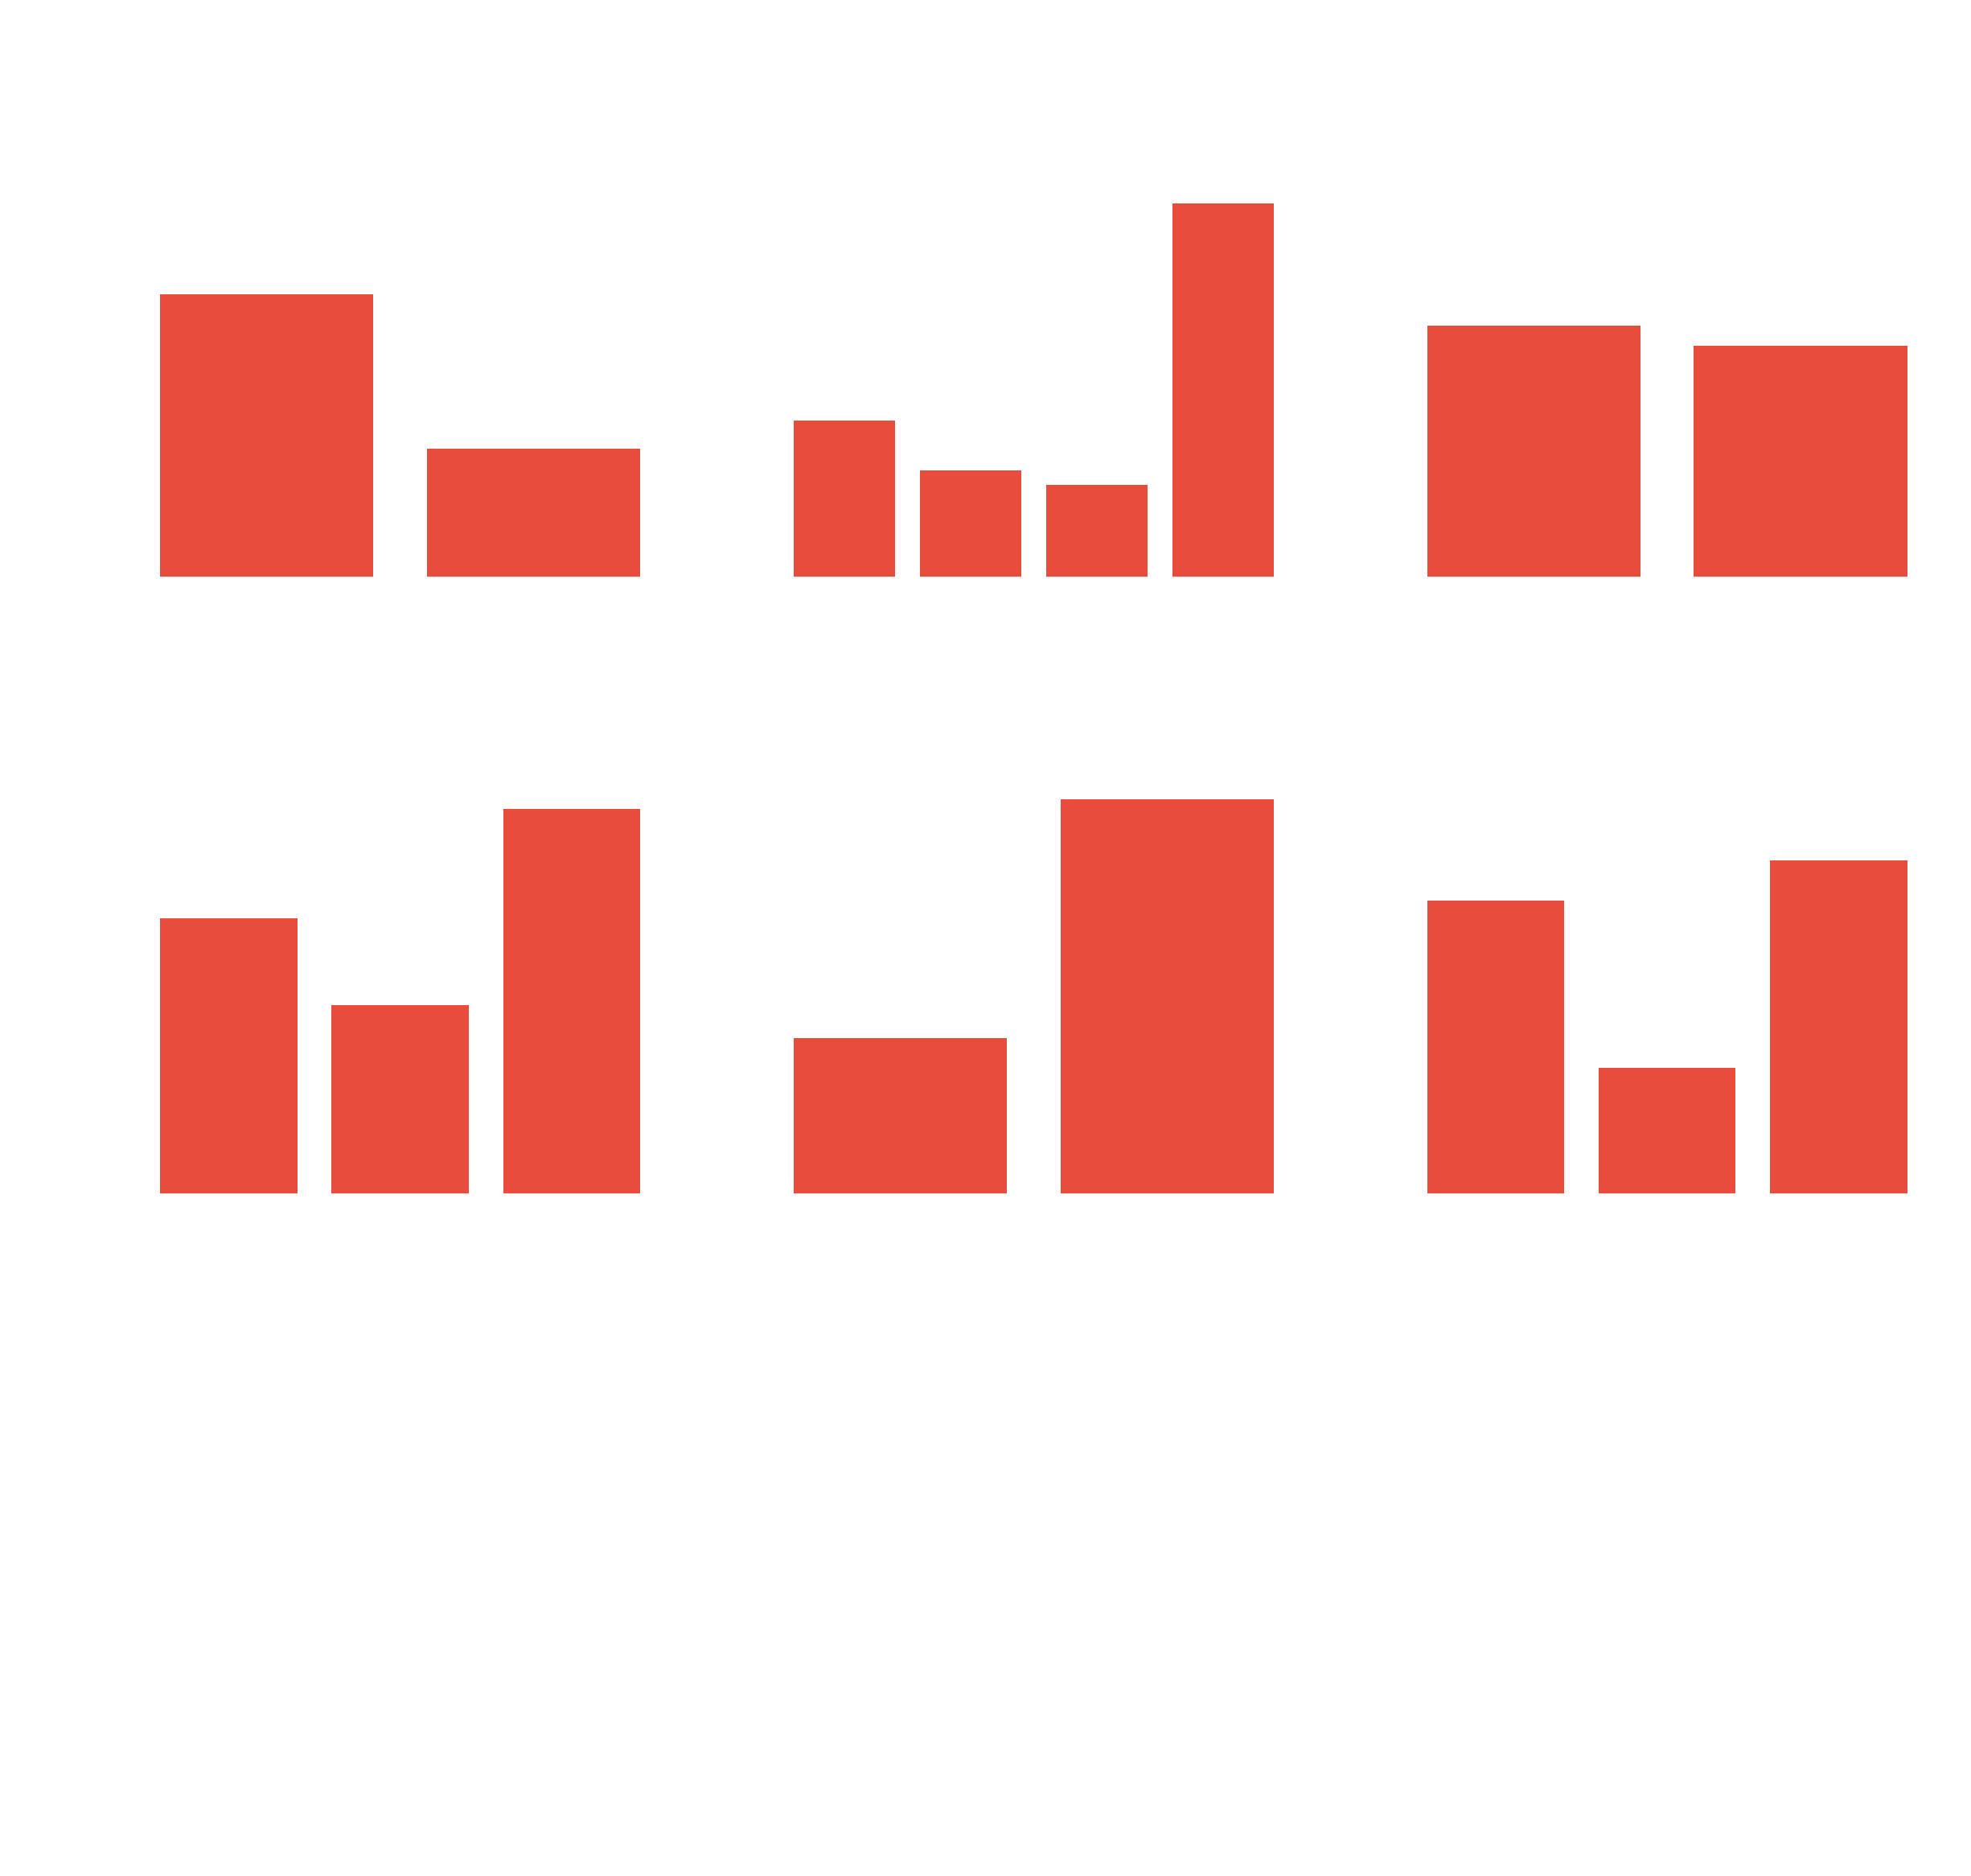

In [14]:
fig, axes = plt.subplots(3, 3, sharey=True, figsize=(12,12))

for i, col in enumerate(categoricals):
    ax = axes.flat[i]
    
    cat_values = d[col].unique()
    with_disease = [len(d[(d[col] == val) & (d.heart_disease == 'yes')]) / len(d[d[col] == val]) for val in cat_values]
    with_disease = [100 * x for x in with_disease]
    
    ax.bar([str(x) for x in cat_values], with_disease)
    ax.set_ylim(0, 100)
    ax.set_xlabel(f"Values for {col}", fontsize=14)
    ax.set_ylabel('Patients with heart disease', fontsize=14)
    ax.set_title(f"Distribution for {col}", fontsize=14)
    
fig.delaxes(axes.flat[-1])
fig.tight_layout();

In [44]:
label = 'heart_disease'
features = [col for col in d.columns if col != label]

In [45]:
X = d[features]
y = d[label]

In [46]:
y = y.replace({'no': 0, 'yes': 1})

# Missing Value

In [47]:
missing_values_count = d.isnull().sum()

In [48]:
missing_values_count[0:100]

age                0
blood_pressure     0
cholesterol        0
hearth_rate        0
st_peak            0
sex                0
chest_pain         0
blood_sugar        0
rest_ecg           0
exercise_angina    0
st_slope           0
thallium           0
n_vessels          0
heart_disease      0
dtype: int64

In [50]:
# how many total missing values do we have?
total_cells = np.product(d.shape)
total_missing = missing_values_count.sum()

In [51]:
(total_missing/total_cells) * 100

0.0

In [53]:
#To check the type of columns
d.dtypes.value_counts()

int64       4
category    2
category    1
category    1
category    1
category    1
category    1
category    1
float64     1
category    1
dtype: int64

In [55]:
#To represent the number of rows by the number of columns
d.shape

(303, 14)

In [57]:
# returns the unique value for each variable
d.nunique(axis=0)

age                 41
blood_pressure      49
cholesterol        152
hearth_rate         91
st_peak             40
sex                  2
chest_pain           4
blood_sugar          2
rest_ecg             3
exercise_angina      2
st_slope             3
thallium             3
n_vessels            5
heart_disease        2
dtype: int64

In [58]:
#Missing_Value_per_ROW_and_Column
# Define function
def missing(x):
    return sum(x.isnull())

In [60]:
# Apply per column
print('Missing values per column')
d.apply(missing, axis = 0).head()

Missing values per column


age               0
blood_pressure    0
cholesterol       0
hearth_rate       0
st_peak           0
dtype: int64

In [61]:
# Apply per row
print('Missing values per row')
d.apply(missing, axis = 1).head()

Missing values per row


0    0
1    0
2    0
3    0
4    0
dtype: int64

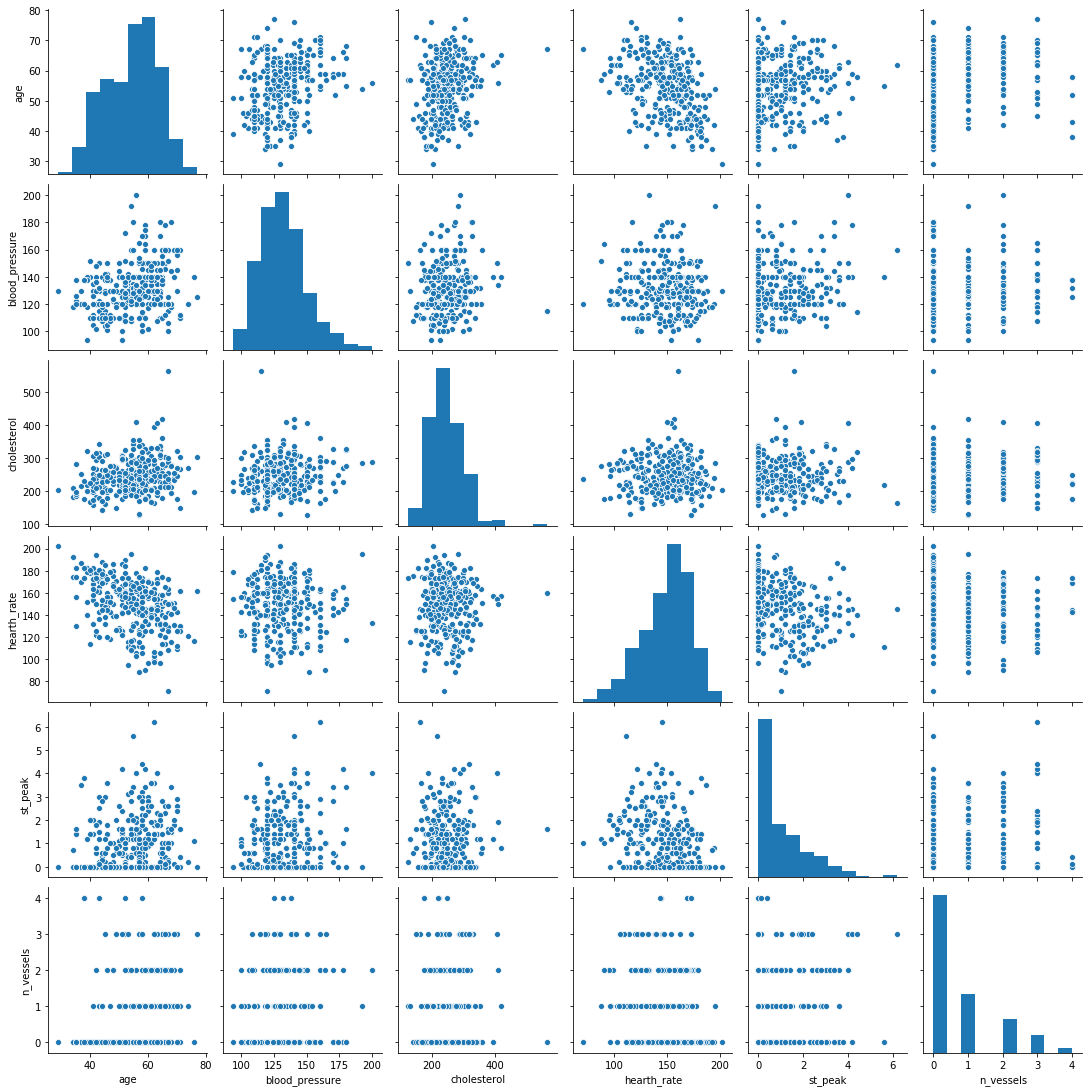

In [63]:
import seaborn as sns
sns.pairplot(d)